#Question 1: Reject option (10 pts)

Consider a binary classification problem with the following loss matrix, where the cost of rejection is a constant. 

$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C_1 & C_2 & Reject\\
   \text{True class} & C_1 & 0 & 2 & c  \\
   & C_2 & 4 & 0 & c \\
  \end{array} } 
$$

If $c$ = 1, determine the respective predicted classes that will minimize the expected loss when $P(C_1|x)$ falls in different value intervals. That is, please give the decision rules for $C_1$, $C_2$ and $Reject$.

## Answer:

Let y = P(C1|x) 

Decision C1: expected cost = 0y+4(1-y) = 4-4y < 1 so y > 0.75

Decision C2: expected cost = 2y  < 1 so y < 0.5

Reject cost > 1 so y between 0.5 and 0.75

So:

P(C1|x) > 0.75 --> C1

0.5 < P(C1|x) < 0.75  --> Reject

P(C1|x) < 0.5 --> C2

# Graphic approach

In [26]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

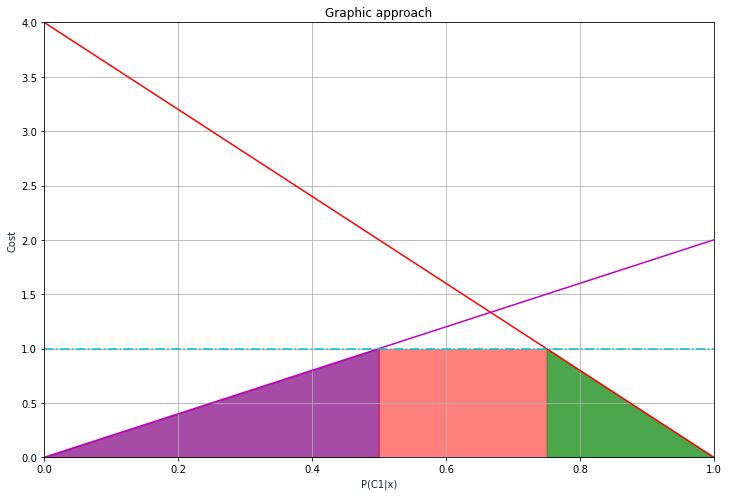

In [27]:
x1 = np.linspace(0,1,1000)
x2 = -4*x1+4
x3 = 2*x1
x4 = x1*0+1

plt.plot(x1, x2, '-r', label='cost for C1')
plt.plot(x1, x3, '-', color='m',label='cost for C2')
plt.plot(x1, x4, '-.', color='c',label='cost threshold')

plt.fill_between(x1,x3,where=x1<0.5,color='purple',alpha=0.7,label='C2')

plt.fill_between(x1,x2,where=x1>0.75,color='green',alpha=0.7,label='C1')

plt.axvspan(0.5,0.75,0,0.25,alpha=0.5, color='red',label='Reject')

plt.title('Graphic approach')
plt.xlabel('P(C1|x)', color='#1C2833')
plt.ylabel('Cost', color='#1C2833')

plt.xlim([0, 1])
plt.ylim([0, 4])
plt.xlim()
plt.rcParams["figure.figsize"] = (12,8)
plt.grid()
plt.show()

# Question 2: Logistic Regression (15 pts) 

Logistic regression has been traditionally used to classify data when a **linear decision boundary** is adequate. However, having an idea of what the distribution looks like could help one come up with a smart data transformation trick that could make the optimal decision boundary become (near) linear in the transformed space. In this question, you are given 2-dimensional data, and each data point belongs to either class 0 or class 1. 

a) **(5 pts)** Train a logistic regression classifier using X_train, y_train. Use the trained model to make predictions on X_train, X_test respectively, and then report the accuracies and F1-scores. Sklearn has a very nice [utility](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) that helps compute the precision, recall, accuracy and F1-scores. 

b) **(5 pts)** Plot the X_train data using matplotlib, use different colors to represent different classes. Comment on the pattern of data distributions, and reason why the logistic regression classifier in (a) does not perform very well.  

c) **(5 pts)** Transform the input X_train and X_test data in such a way that a linear decision boundary will be effective. Train a new logistic regression classifier on this transformed X_train data. Use the trained model to make predictions on transformed X_train, transformed X_test respectively, and then report the accuracies and F1-scores. 

**Hint**: Carefully analyze the plot you made in (b), observe the decision boundaries, which should guide you towards the right direction.

In [28]:
import numpy as np

data = np.load('D:\\05_GitHub\\Data_Science_Projects\\Advanced_Machine_Learning\\data.npy', allow_pickle=True)

X_train, y_train = data.item().get('X_train'), data.item().get('y_train')
X_test, y_test = data.item().get('X_test'), data.item().get('y_test')

## Answer:

# a)

In [29]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [30]:

np.random.seed(42)
x1 = np.random.uniform(low=-7.5, high=7.5, size=300)
x2 = np.random.uniform(low=-7.5, high=7.5, size=300)

y_fn = (0.3*x1**2 + 0.8*x2**2) <10

from matplotlib import pyplot as plt

X_train = np.column_stack([x1, x2])
y_train = y_fn
print("Train: ", X_train.shape)

x1 = np.random.uniform(low=-7.5, high=7.5, size=100)
x2 = np.random.uniform(low=-7.5, high=7.5, size=100)
y_fn = (0.3*x1**2 + 0.8*x2**2) <10

X_test = np.column_stack([x1, x2])
y_test = y_fn
print("Test: ", X_test.shape)

X_train = X_train + np.random.random(size=X_train.shape)/10
X_test = X_test + np.random.random(size=X_test.shape)/10

Train:  (300, 2)
Test:  (100, 2)


In [31]:
lrc=LogisticRegression()
lrc.fit(X_train, y_train)

y_train_pred=lrc.predict(X_train)
y_test_pred=lrc.predict(X_test)

In [32]:
from sklearn.metrics import classification_report

target_name = ['True', 'False']
print(classification_report(y_train, y_train_pred, target_names=target_name))
print(classification_report(y_test, y_test_pred, target_names=target_name))

              precision    recall  f1-score   support

        True       0.71      1.00      0.83       214
       False       0.00      0.00      0.00        86

    accuracy                           0.71       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.51      0.71      0.59       300

              precision    recall  f1-score   support

        True       0.69      1.00      0.82        69
       False       0.00      0.00      0.00        31

    accuracy                           0.69       100
   macro avg       0.34      0.50      0.41       100
weighted avg       0.48      0.69      0.56       100



C:\Users\Jessi\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jessi\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jessi\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C

# b)

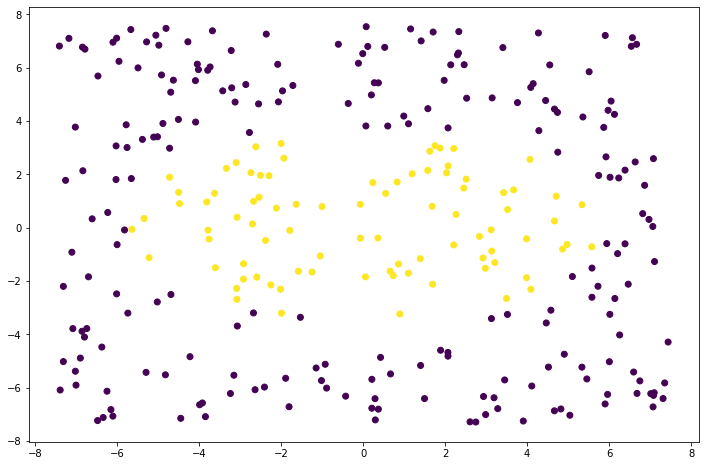

In [33]:
colors = y_train
x=X_train[:,0]
y=X_train[:,1]

plt.scatter(x, y, c=colors)
plt.legend=y_train
plt.show()

# The data doesn't have a linear boundary, that's why the logistic regression doesn't work well - all samples are predicted as the true class.

# c)

In [34]:
np.random.seed(42)

x1 = np.random.uniform(low=-7.5, high=7.5, size=300)
x2 = np.random.uniform(low=-7.5, high=7.5, size=300)

y_fn = (0.3*x1 + 0.8*x2)<1

from matplotlib import pyplot as plt

X_train = np.column_stack([x1, x2])
y_train = y_fn
print("Train: ", X_train.shape)

x1 = np.random.uniform(low=-7.5, high=7.5, size=100)
x2 = np.random.uniform(low=-7.5, high=7.5, size=100)
y_fn = (0.3*x1 + 0.8*x2) <1

X_test = np.column_stack([x1, x2])
y_test = y_fn
print("Test: ", X_test.shape)

X_train = X_train + np.random.random(size=X_train.shape)/10
X_test = X_test + np.random.random(size=X_test.shape)/10

Train:  (300, 2)
Test:  (100, 2)


In [35]:
lrc=LogisticRegression()
lrc.fit(X_train, y_train)

y_train_pred=lrc.predict(X_train)
y_test_pred=lrc.predict(X_test)

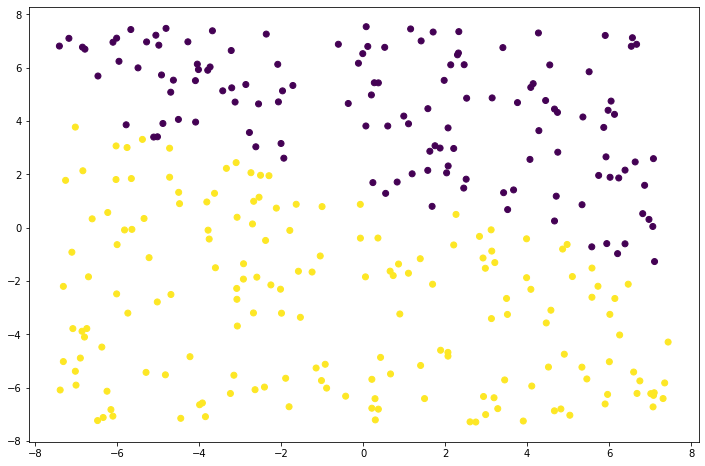

In [36]:
colors = y_train
x=X_train[:,0]
y=X_train[:,1]

plt.scatter(x, y, c=colors)
plt.legend=y_train
plt.show()

Populating the interactive namespace from numpy and matplotlib


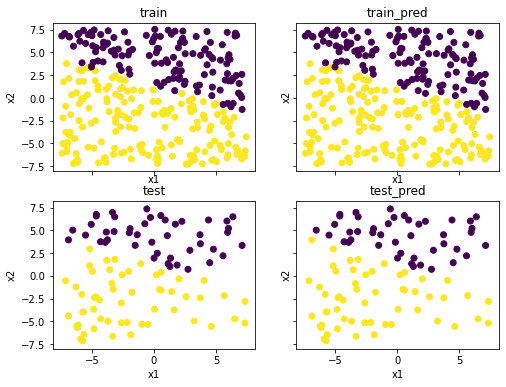

In [37]:

%pylab inline

# First, create a blank figure and "axis" objects
fig, ((ax11,ax12),(ax21,ax22)) = subplots(nrows=2,
                                          ncols=2,
                                          sharex=True,
                                          sharey=True,
                                          figsize=(8, 6))

# Each "axis" object corresponds to one subplot
# Fill in the subplots.

colors = y_train

ax11.scatter(X_train[:,0], X_train[:,1], marker='o', c=y_train, linestyle='None')
ax11.set_title('train')
ax11.set_xlabel('x1')
ax11.set_ylabel('x2')

ax12.scatter(X_train[:,0], X_train[:,1], marker='o', c=y_train_pred, linestyle='None')
ax11.legend=y_train_pred
ax12.set_title('train_pred')
ax12.set_xlabel('x1')
ax12.set_ylabel('x2')

ax21.scatter(X_test[:,0], X_test[:,1], marker='o', c=y_test, linestyle='None')
ax21.set_title('test')
ax21.set_xlabel('x1')
ax21.set_ylabel('x2')

ax22.scatter(X_test[:,0], X_test[:,1], marker='o', c=y_test_pred, linestyle='None')
ax22.set_title('test_pred')
ax22.set_xlabel('x1')
ax22.set_ylabel('x2')


show()

In [38]:
target_name = ['True', 'False']
print(classification_report(y_train, y_train_pred, target_names=target_name))
print(classification_report(y_test, y_test_pred, target_names=target_name))

              precision    recall  f1-score   support

        True       0.99      0.99      0.99       130
       False       0.99      0.99      0.99       170

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

              precision    recall  f1-score   support

        True       1.00      0.98      0.99        45
       False       0.98      1.00      0.99        55

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



# Question 3: Bayesian Network (5 pts)

A Bayesian network is a directed acyclic graph (DAG) that captures a subset of the independence relationships of a given joint probability distribution. 

In a Bayesian network $G=(V,E)$, each node $i \in V$in the directed graph corresponds to a random variable and each directed edge $e \in E$ represents a statistical dependence. Each node is associated with a conditional probability distribution of the corresponding random variables given its parents in the DAG. The joint probability distribution factorizes w.r.t the directed graph $G$ if $p(x_1, ..., x_n)=\prod_{i \in V} p(x_i | x_{parents(i)})$, provided the variables are visited in a topologically sorted order. Please write the joint probability distribution that factorizes w.r.t this graph, in as simple a form as possible (i.e. that results in the smallest possible conditional probability tables:


In [39]:
%%html
<iframe src="https://drive.google.com/file/d/1XigbvsWpNvlols3QarVjDfYf2Dnf3emy/preview" width="640" height="480" allow="autoplay"></iframe>

## Answer:


$\displaystyle \prod_{i}P(x_{i}|C_{j})$ =  P(A)\*P(B|A)\*P(E|B)\*P(C|A,E)\*P(D|B)\*P(F|C,D,E)

# Question 4: Counterfactuals (25 pts)


To show the effectiveness of a newly proposed model, one needs to compare it with multiple  existing solutions, across multiple datasets with different properties, and typically using multiple evaluation metrics. 

One of the emerging requirements in industry is to be able to explain decisions, and counterfactual (CF) explanations turn out to be a lead contender. Hence a new CF approach also needs to be evaluated comprehensively. See [1] for a review on conterfactual explanations. 

An example of a short comparative testing for CFs is given in [2], (you don’t need to understand the method in [2] since I have not covered this type of techinques in class, just see the result tables). The goal of this question is to **try to obtain results that are similar to those reported in [2]** (note that they give details of their model settings in the appendix). In particular, you will evaluate the following datasets: Breast Cancer, Pima diabetes and Adult Census across 5 metrics (Validity, sparsity, proximity, diversity, in-distributionness). 

**Note**: **Section A** students only need to report on the **Breat Cancer and Adult Census datasets** while **Section B** students only need to report results on the **Pima diabetes and Adult Census datasets**.

[1] Verma, Dickerson, Hines. Counterfactual Explanations for Machine Learning: A Review. [arXiv:2010.10596](https://arxiv.org/abs/2010.10596) (2020) 

[2] Samoilescu, et al. Model-agnostic and Scalable Counterfactual Explanations via Reinforcement Learning.  [arXiv:2106.02597](https://arxiv.org/abs/2106.02597) (2021) 


a) Train **Random Forest, MLP and Logistic Regression** models on your datasets and report the accuracies on each of the datasets, show the accuracy on both the training and test set in a table.

Use the code snippets given below to load the datasets and make the split using the following code snippet: ```X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)``` 

```
# Breast cancer dataset, for Section A only
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']
X = pd.DataFrame(data=X, columns=cols)

# Pima Diabetes dataset, for Section B only
def load_diabetes():
  df = pd.read_csv('diabetes.csv')
  X = df.drop(['Outcome'], axis=1)
  y = df[['Outcome']]
  return X, np.reshape(y, (-1, ))

X, y = load_diabetes()

# adult census dataset, for Section A and Section B
def load_adult():
  df = pd.read_csv('adult.csv')
  df = pd.get_dummies(df)
  X = df.drop(['target'], axis=1)
  y = df[['target']]
  return X, np.reshape(y, (-1, ))

X, y = load_adult()
```
b) For each of the datasets, plot the calibration curves for the entire dataset. The [module](https://scikit-learn.org/stable/modules/calibration.html) from sklearn should help.

For each dataset, the calibration curve should show a y=x line as the perfect calibration, as well as the calibration curves for each of the model predictions. Mark the plots correctly using a legend.

c) [DiCE](https://github.com/interpretml/DiCE) is an open-source library that is based on the paper [Explaining Machine Learning Classifiers through Diverse Counterfactual Explanations](https://arxiv.org/abs/1905.07697). The codebase has 3 methods in which they generate counterfactuals - random sampling, KD-tree and genetic algorithm. Use DiCE (random) and DiCE (genetic) to generate 5 counterfactuals each for the first 50 data point in the test set for each of the models. Report the following metrics for each of the datasets and each of the models. So essentially, you will need to create a table for each dataset where the metrics are present in the columns and each row represents a different model. 

Here are some pointers that will help you get started with DiCE and the metrics needed. 
- Install the library using ```!pip install dice-ml```
- They have an excellent documentation on their GitHub, and their implementation notebooks will be very helpful. You can check [this](https://github.com/interpretml/DiCE/blob/master/docs/source/notebooks/DiCE_model_agnostic_CFs.ipynb) to get started.
- Section 4.1 in the [DiCE paper](https://arxiv.org/pdf/1905.07697.pdf) discuss and mathematically formulate validity, sparsity, diversity and proximity. Read those carefully and implement functions that can evaluate the metrics. Use the ```Continuous-Proximity``` metric just for simplicity. Use the ```Diversity``` metric and not ```Count-Diversity```.
- For the in-distributionness, use the following code snippet to evaluate the MMD (maximum mean discrepancy) score.

```
def get_mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()
```


## Answer:

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn import preprocessing
import numpy as np

# Breast Cancer Dataset

In [41]:
data = load_breast_cancer()
X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 


bc_scaler=preprocessing.StandardScaler().fit(X_train)
X_train_bc_sc=bc_scaler.transform(X_train)
X_test_bc_sc=bc_scaler.transform(X_test)
y_train_bc=y_train
y_test_bc=y_test
# Breast cancer dataset, for Section A only


cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']

# RandomForest

In [42]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [43]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfc_bc = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfc_bc.fit(X_train_bc_sc, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [44]:
rfc_bc.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [45]:
rfc_bc=RandomForestClassifier(n_estimators = 200, 
                          min_samples_split = 2,
                          min_samples_leaf = 1,
                          max_features = 'sqrt',
                          max_depth = 90,
                          bootstrap = False)
rfc_bc.fit(X_train_bc_sc,y_train_bc)
y_train_bc_pred_rfc = rfc.predict(X_train_bc_sc)
y_test_bc_pred_rfc = rfc.predict(X_test_bc_sc)

NameError: name 'rfc' is not defined

# MLP

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=1000)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu','lbfgs'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

mlpc = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
mlpc.fit(X_train_bc_sc, y_train_bc) # X is train samples and y is the corresponding labels

In [ ]:
mlpc.best_params_

In [ ]:
mlpc_bc = MLPClassifier(max_iter=1000,
                    activation = 'tanh',
                    alpha = 0.05,
                    hidden_layer_sizes = (50, 100, 50),
                    learning_rate = 'adaptive',
                    solver = 'sgd')
mlpc_bc.fit(X_train_bc_sc, y_train_bc)

In [ ]:
y_train_bc_pred_mlpc = mlpc.predict(X_train_bc_sc)
y_test_bc_pred_mlpc = mlpc.predict(X_test_bc_sc)

# LogisticRegression

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

lrc_bc=LogisticRegression(max_iter=10000)
lrc_bc.fit(X_train_bc_sc, y_train_bc)

y_train_bc_pred_lrc = lrc_bc.predict(X_train_bc_sc)
y_test_bc_pred_lrc = lrc_bc.predict(X_test_bc_sc)

# Compare accuracy score

In [ ]:
from sklearn.metrics import accuracy_score
rfc_score_train_bc=accuracy_score(y_train_bc, y_train_bc_pred_rfc)
rfc_score_test_bc=accuracy_score(y_test_bc, y_test_bc_pred_rfc)
mlpc_score_train_bc=accuracy_score(y_train_bc, y_train_bc_pred_mlpc)
mlpc_score_test_bc=accuracy_score(y_test_bc, y_test_bc_pred_mlpc)
lrc_score_train_bc=accuracy_score(y_train_bc, y_train_bc_pred_lrc)
lrc_score_test_bc=accuracy_score(y_test_bc, y_test_bc_pred_lrc)

In [ ]:
Accuracy_table=pd.DataFrame(np.zeros((6,3)))

Accuracy_table.iloc[0,0]='Random Forest-Brest Cancer'
Accuracy_table.iloc[0,1]= rfc_score_train_bc
Accuracy_table.iloc[0,2]= rfc_score_test_bc
Accuracy_table.iloc[1,0]='MLP-Brest Cancer'
Accuracy_table.iloc[1,1]= mlpc_score_train_bc
Accuracy_table.iloc[1,2]= mlpc_score_test_bc
Accuracy_table.iloc[2,0]='Logistic Regression-Brest Cancer'
Accuracy_table.iloc[2,1]= lrc_score_train_bc
Accuracy_table.iloc[2,2]= lrc_score_test_bc
Accuracy_table.columns=['Accuracy','Train','Test']
Accuracy_table

# b) PLOT

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve

In [ ]:
nbin=5
prob_true_rfc_bc, prob_pred_rfc_bc= calibration_curve(y_test_bc, rfc_bc.predict_proba(X_test_bc_sc)[:,1], n_bins=nbin)
prob_true_mlpc_bc, prob_pred_mlpc_bc= calibration_curve(y_test_bc, mlpc_bc.predict_proba(X_test_bc_sc)[:,1], n_bins=nbin)
prob_true_lrc_bc, prob_pred_lrc_bc= calibration_curve(y_test_bc, lrc_bc.predict_proba(X_test_bc_sc)[:,1], n_bins=nbin)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(prob_pred_rfc_bc, prob_true_rfc_bc, marker='o', linewidth=1, label='rfc')
plt.plot(prob_pred_mlpc_bc, prob_true_mlpc_bc, marker='o', linewidth=1, label='mlp')
plt.plot(prob_pred_lrc_bc, prob_true_lrc_bc, marker='o', linewidth=1, label='logreg')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
ax.legend()
plt.show()

# Random Forest Model are slightly better calibrated

# Adult Dataset

In [ ]:
from sklearn import preprocessing

In [1]:
# adult census dataset, for Section A and Section B
import numpy as np
import pandas as pd

def load_adult():
    df = pd.read_csv('D:\\05_GitHub\\Data_Science_Projects\\Advanced_Machine_Learning\\HW4\\adult.csv')
    df = pd.get_dummies(df)
    X = df.drop(['target'], axis=1)
    y = df[['target']]
    return X, np.reshape(y, (-1, ))

X, y = load_adult()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
ad_scaler=preprocessing.StandardScaler().fit(X_train)
X_train_ad_sc=ad_scaler.transform(X_train)
X_test_ad_sc=ad_scaler.transform(X_test)
y_train_ad=y_train
y_test_ad=y_test

# RandomForest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf= RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfc_ad = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfc_ad.fit(X_train_ad_sc, y_train_ad)

In [ ]:
rf_random.best_params_

In [ ]:
rfc_ad=RandomForestClassifier(n_estimators = 200, 
                          min_samples_split = 2,
                          min_samples_leaf = 1,
                          max_features = 'sqrt',
                          max_depth = 90,
                          bootstrap = False)
rfc_ad.fit(X_train_ad_sc,y_train_ad)
y_train_pred_rfc_ad = rfc.predict(X_train_ad_sc)
y_test_pred_rfc_ad = rfc.predict(X_test_ad_sc)

# MLP

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=1000)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu','lbfgs'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

mlpc = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
mlpc.fit(X_train_ad_sc, y_train_ad) # X is train samples and y is the corresponding labels

In [ ]:
mlpc.best_params_

In [ ]:
mlpc_ad=MLPClassifier(max_iter=1000,
                   activation='tanh',
                   alpha=0.001,
                   hidden_layer_sizes = (50, 100, 50),
                   learning_rate = 'constant',
                   solver ='sgd'
                   )
mlpc_ad.fit(X_train_ad_sc,y_train_ad)

In [ ]:
y_train_pred_mlpc_ad = mlpc_ad.predict(X_train_ad_sc)
y_test_pred_mlpc_ad = mlpc_ad.predict(X_test_ad_sc)

# LogisticRegression

In [ ]:
from sklearn.neural_network import MLPClassifier

lrc_ad=LogisticRegression(max_iter=10000)
lrc_ad.fit(X_train_ad_sc, y_train_ad)

y_train_pred_lrc_ad = lrc_ad.predict(X_train_ad_sc)
y_test_pred_lrc_ad = lrc_ad.predict(X_test_ad_sc)

# Compare accuracy score

In [ ]:
from sklearn.metrics import accuracy_score
rfc_score_train_ad=accuracy_score(y_train_ad, y_train_pred_rfc_ad)
rfc_score_test_ad=accuracy_score(y_test_ad, y_test_pred_rfc_ad)
mlpc_score_train_ad=accuracy_score(y_train_ad, y_train_pred_mlpc_ad)
mlpc_score_test_ad=accuracy_score(y_test_ad, y_test_pred_mlpc_ad)
lrc_score_train_ad=accuracy_score(y_train_ad, y_train_pred_lrc_ad)
lrc_score_test_ad=accuracy_score(y_test_ad, y_test_pred_lrc_ad)

In [ ]:

Accuracy_table.iloc[3,0]='Random Forest-adult'
Accuracy_table.iloc[3,1]= rfc_score_train_ad
Accuracy_table.iloc[3,2]= rfc_score_test_ad
Accuracy_table.iloc[4,0]='MLP-adult'
Accuracy_table.iloc[4,1]= mlpc_score_train_ad
Accuracy_table.iloc[4,2]= mlpc_score_test_ad
Accuracy_table.iloc[5,0]='Logistic Regression-adult'
Accuracy_table.iloc[5,1]= lrc_score_train_ad
Accuracy_table.iloc[5,2]= lrc_score_test_ad
Accuracy_table

# b) PLOT

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve

In [ ]:
nbin=5
prob_true_rfc_ad, prob_pred_rfc_ad= calibration_curve(y_test_ad, rfc_ad.predict_proba(X_test_ad_sc)[:,1], n_bins=nbin)
prob_true_mlpc_ad, prob_pred_mlpc_ad= calibration_curve(y_test_ad, mlpc_ad.predict_proba(X_test_ad_sc)[:,1], n_bins=nbin)
prob_true_lrc_ad, prob_pred_lrc_ad= calibration_curve(y_test_ad, lrc_ad.predict_proba(X_test_ad_sc)[:,1], n_bins=nbin)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(prob_pred_rfc_ad, prob_true_rfc_ad, marker='o', linewidth=1, label='rfc')
plt.plot(prob_pred_mlpc_ad, prob_true_mlpc_ad, marker='o', linewidth=1, label='mlp')
plt.plot(prob_pred_lrc_ad, prob_true_lrc_ad, marker='o', linewidth=1, label='logreg')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
ax.legend()
plt.show()

# Random Forest Model are slightly better calibrated

# C) DiCE

In [ ]:
#!pip install dice-ml
# import DiCE
import dice_ml
from dice_ml.utils import helpers  # helper functions

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Breast Cancer Data


In [ ]:
X_test_comb_bc=pd.DataFrame(X_test_bc_sc)
X_test_comb_bc.columns=cols
X_test_comb_bc['diagnose']=y_test_bc

# Adult Data

In [ ]:
X_test_comb_ad=pd.DataFrame(X_test_ad_sc)
X_test_comb_ad.columns=cols
X_test_comb_ad['target']=y_test_ad

In [ ]:
# provide the trained ML model to DiCE's model object - Breast Cancer

backend = 'sklearn'
d_bc = dice_ml.Data(dataframe=X_test_comb_bc, continuous_features=cols, outcome_name= 'diagnose')
m_rfc_bc = dice_ml.Model(model=rfc_bc, backend=backend)
m_mlpc_bc = dice_ml.Model(model=mlpc_bc,backend=backend)
m_lrc_bc = dice_ml.Model(model=lrc_bc,backend=backend)

In [ ]:
exp_random_rfc_bc = dice_ml.Dice(d_bc, m_rfc_bc, method="random")
exp_random_mlpc_bc = dice_ml.Dice(d_bc, m_mlpc_bc, method="random")
exp_random_lrc_bc = dice_ml.Dice(d_bc, m_lrc_bc, method="random")
exp_genetic_rfc_bc = dice_ml.Dice(d_bc, m_rfc_bc, method="genetic")
exp_genetic_mlpc_bc = dice_ml.Dice(d_bc, m_mlpc_bc, method="genetic")
exp_genetic_lrc_bc = dice_ml.Dice(d_bc, m_lrc_bc, method="genetic")

In [ ]:
# Breast Cancer CFs - Random
import warnings
warnings.filterwarnings('ignore')
query_instances = X_test_bc_sc[0:15]
dice_exp_random_rfc_bc = exp_random_rfc_bc.generate_counterfactuals(query_instances, total_CFs=5, desired_class="opposite", verbose=False)
dice_exp_random_mlpc_bc = exp_random_mlpc_bc.generate_counterfactuals(query_instances, total_CFs=5, desired_class="opposite", verbose=False)
dice_exp_random_lrc_bc = exp_random_lrc_bc.generate_counterfactuals(query_instances, total_CFs=5, desired_class="opposite", verbose=False)

In [ ]:
# Breast Cancer CFs Genetic
import warnings
warnings.filterwarnings('ignore')
query_instances = X_test_bc_sc[0:15]
dice_exp_genetic_rfc_bc = exp_genetic_rfc_bc.generate_counterfactuals(query_instances, total_CFs=5, desired_class="opposite", verbose=False)
dice_exp_genetic_mlpc_bc = exp_genetic_mlpc_bc.generate_counterfactuals(query_instances, total_CFs=5, desired_class="opposite", verbose=False)
dice_exp_genetic_lrc_bc = exp_genetic_lrc_bc.generate_counterfactuals(query_instances, total_CFs=5, desired_class="opposite", verbose=False)

In [ ]:
# provide the trained ML model to DiCE's model object - Adult

backend = 'sklearn'
d_ad = dice_ml.Data(dataframe=X_test_comb_ad, continuous_features=X_train_ad_sc.columns, outcome_name= 'target')
m_rfc_ad = dice_ml.Model(model=rfc_ad, backend=backend)
m_mlpc_ad = dice_ml.Model(model=mlpc_ad,backend=backend)
m_lrc_ad = dice_ml.Model(model=lrc_ad,backend=backend)

In [ ]:
exp_random_rfc_ad = dice_ml.Dice(d_ad, m_rfc_ad, method="random")
exp_random_mlpc_ad = dice_ml.Dice(d_ad, m_mlpc_ad, method="random")
exp_random_lrc_ad = dice_ml.Dice(d_ad, m_lrc_ad, method="random")
exp_genetic_rfc_ad = dice_ml.Dice(d_ad, m_rfc_ad, method="genetic")
exp_genetic_mlpc_ad = dice_ml.Dice(d_ad, m_mlpc_ad, method="genetic")
exp_genetic_lrc_ad = dice_ml.Dice(d_ad, m_lrc_ad, method="genetic")

In [ ]:
# Adult CFs - Random
import warnings
warnings.filterwarnings('ignore')
query_instances = X_test_ad_sc[0:15]
dice_exp_random_rfc_ad = exp_random_rfc_ad.generate_counterfactuals(query_instances, total_CFs=5, desired_class="opposite", verbose=False)
dice_exp_random_mlpc_ad = exp_random_mlpc_ad.generate_counterfactuals(query_instances, total_CFs=5, desired_class="opposite", verbose=False)
dice_exp_random_lrc_ad = exp_random_lrc_ad.generate_counterfactuals(query_instances, total_CFs=5, desired_class="opposite", verbose=False)


In [ ]:
# Adult CFs Genetic
import warnings
warnings.filterwarnings('ignore')
query_instances = X_test_ad_sc[0:15]
dice_exp_genetic_rfc_ad = exp_genetic_rfc_ad.generate_counterfactuals(query_instances, total_CFs=5, desired_class="opposite", verbose=False)
dice_exp_genetic_mlpc_ad = exp_genetic_mlpc_ad.generate_counterfactuals(query_instances, total_CFs=5, desired_class="opposite", verbose=False)
dice_exp_genetic_lrc_ad = exp_genetic_lrc_ad.generate_counterfactuals(query_instances, total_CFs=5, desired_class="opposite", verbose=False)

In [ ]:
# Get cf of a sample x to a list

def get_test_and_cf(model):
    cf = []
    x = []
    for i in range(len(model.cf_examples_list)):
        cf.append(model.cf_examples_list[i].final_cfs_df.values.tolist())
        x.append(model.cf_examples_list[i].test_instance_df.values.tolist())
    return x, cf

In [ ]:

test_rand_rfc_bc, rand_rfc_bc_cf = get_test_and_cf(dice_exp_random_rfc_bc)
test_rand_mlpc_bc, rand_mlpc_bc_cf = get_test_and_cf(dice_exp_random_mlpc_bc)
test_rand_lrc_bc, rand_lrc_bc_cf = get_test_and_cf(dice_exp_random_lrc_bc)
test_gene_rfc_bc, gene_rfc_bc_cf = get_test_and_cf(dice_exp_genetic_rfc_bc)
test_gene_mlpc_bc, gene_mlpc_bc_cf = get_test_and_cf(dice_exp_genetic_mlpc_bc)
test_gene_lrc_bc, gene_lrc_bc_cf = get_test_and_cf(dice_exp_genetic_lrc_bc)

test_rand_rfc_ad, rand_rfc_ad_cf = get_test_and_cf(dice_exp_random_rfc_ad)
test_rand_mlpc_ad, rand_mlpc_ad_cf = get_test_and_cf(dice_exp_random_mlpc_ad)
test_rand_lrc_ad, rand_lrc_ad_cf = get_test_and_cf(dice_exp_random_lrc_ad)
test_gene_rfc_ad, gene_rfc_ad_cf = get_test_and_cf(dice_exp_genetic_rfc_ad)
test_gene_mlpc_ad, gene_mlpc_ad_cf = get_test_and_cf(dice_exp_genetic_mlpc_ad)
test_gene_lrc_ad, gene_lrc_ad_cf = get_test_and_cf(dice_exp_genetic_lrc_ad)

In [ ]:
from scipy import stats
# MAD for calculating proximity
MAD_bc = stats.median_absolute_deviation(X_train_bc_sc)
MAD_ad = stats.median_absolute_deviation(X_train_ad_sc)

In [ ]:
#All functions to get proximity and diversity

def chk_validity(x, cf, model):  # check if how many cf are valid (opposite)
    valid_ct = 0
    for i in cf:
         if (model.predict([i[:-1]])[0] > 0.5 and x[0][-1] == 0) or (model.predict([i[:-1]])[0] < 0.5 and x[0][-1] == 1):
            valid_ct += 1
    return valid_ct/len(cf)

def cont_proximity(x, cf, MAD):   # captures the relative distance between cf and sample 
    res = []
    for i in cf:
        res.append(sum(abs(np.array(i[:-1])-np.array(x[0][:-1]))/MAD)/len(x[0][:-1]))
    return -1*sum(res)/len(res)

def cal_sparsity(x, cf):   # Capture the numbers of features that are different
    cnt = 0
    for i in cf:
        cnt += sum(np.array(x[0][:-1]) != np.array(i[:-1]))
    return 1 - cnt/(len(cf)*len(x[0][:-1]))    #  kd/(number of cfs*number of features)

def cal_diversity(cf): # feature-wise distances between each cf pair
    res = []
    for i in range(len(cf)):
        for j in range(i+1,len(cf)):
            res.append(sum((np.array(cf[i][:-1])-np.array(cf[j][:-1]))**2))
    return sum(res)/len(res)

def get_mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = pairwise.rbf_kernel(X, X, gamma)
    YY = pairwise.rbf_kernel(Y, Y, gamma)
    XY = pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean() 
    

In [ ]:
dic = {}

validity = np.mean([cal_validity(i, j, bc_rfc) for i, j in zip(test_rand_rfc_bc, rand_rfc_bc_cf)
proximity = np.mean([cal_proximity(i, j, MAD_bc) for i, j in zip(test_rand_rfc_bc, rand_rfc_bc_cf)])
sparsity = np.mean([cal_sparsity(i, j) for i, j in zip(test_rand_rfc_bc, rand_rfc_bc_cf)])
diversity = np.mean([cal_diversity(i) for i in rand_rfc_bc_cf])
distributionness = np.mean([get_mmd_rbf(j, i) for i, j in zip(test_rand_rfc_bc, rand_rfc_bc_cf)])

dic['DiCE(Random)'] = [validity, proximity, sparsity, diversity, distributionness]

validity = np.mean([cal_validity(i, j, bc_rf) for i, j in zip(test_gene_rfc_bc, gene_rfc_bc_cf)])
proximity = np.mean([cal_proximity(i, j, MAD_bc) for i, j in zip(test_gene_rfc_bc, gene_rfc_bc_cf)])
sparsity = np.mean([cal_sparsity(i, j) for i, j in zip(test_gene_rfc_bc, gene_rfc_bc_cf)])
diversity = np.mean([cal_diversity(i) for i in gene_rfc_bc_cf])
distributionness = np.mean([get_mmd_rbf(j, i) for i, j in zip(test_gene_rfc_bc, gene_rfc_bc_cf)])

dic['DiCE(Genetic)'] = [validity, proximity, sparsity, diversity, distributionness]

print('Rondom Forest Model for Breast Cancer Dataset')
pd.DataFrame.from_dict(dic, orient='index', columns=['validity', 'proximity', 'sparsity', 'diversity', 'distributionness'])